In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


---
## Data Loading
---

#### Read `dataset.csv` into Jupyter Notebook 

In [9]:
Cardiovascular_dataset = pd.read_csv('dataset.csv')

In [310]:
#Cardiovascular_dataset 

In [139]:
#Cardiovascular_dataset.describe

---
## 1.0 Data Exploration and Visualization
---
#### Null value in Dataset
No null value is found in dataset.

There are in total **2100 data** `values` (rows) and **18** `features` found from the dataset.
<br>

#### Data type found in Dataset

There are 10 `Object` and 8 `Numerical` data features found in the dataset.

In [67]:
Cardiovascular_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  2100 non-null   object 
 1   Age                     2100 non-null   int64  
 2   Height(cm)              2100 non-null   float64
 3   Weight(kg)              2100 non-null   float64
 4   Family_history          2100 non-null   object 
 5   Alcohol                 2100 non-null   object 
 6   Junk_food               2100 non-null   object 
 7   Vege_day                2100 non-null   int64  
 8   Meals_day               2100 non-null   int64  
 9   Snack                   2100 non-null   object 
 10  Smoking                 2100 non-null   object 
 11  Water_intake(L)         2100 non-null   float64
 12  Transportation          2100 non-null   object 
 13  Exercise                2100 non-null   int64  
 14  TV                      2100 non-null   

In [57]:
Cardiovascular_dataset.isnull().sum()

Gender                    0
Age                       0
Height(cm)                0
Weight(kg)                0
Family_history            0
Alcohol                   0
Junk_food                 0
Vege_day                  0
Meals_day                 0
Snack                     0
Smoking                   0
Water_intake(L)           0
Transportation            0
Exercise                  0
TV                        0
Income                    0
Discipline                0
Cardiovascular_risk(y)    0
dtype: int64

In [313]:
#Categorical data
print(Cardiovascular_dataset['Gender'].value_counts(),'\n')
print(Cardiovascular_dataset['Family_history'].value_counts(),'\n')
print(Cardiovascular_dataset['Alcohol'].value_counts(),'\n')
print(Cardiovascular_dataset['Junk_food'].value_counts(),'\n')
print(Cardiovascular_dataset['Snack'].value_counts(),'\n')
print(Cardiovascular_dataset['Smoking'].value_counts(),'\n')
print(Cardiovascular_dataset['Transportation'].value_counts(),'\n')
print(Cardiovascular_dataset['TV'].value_counts(),'\n')
print(Cardiovascular_dataset['Cardiovascular_risk(y)'].value_counts())

### Histogram graphing of features ###

In [315]:
#Histogram Graphing showing the data contexts, no heavy tail context found
Cardiovascular_dataset.hist(bins=50, figsize=(20,15))
plt.show()

---
## 2.0 Data Preprocessing
---

### 2.1 Split the whole dataset into  `Training dataset`(x) and `Target values`(y) ###

In [11]:
X_data = Cardiovascular_dataset.drop('Cardiovascular_risk(y)', axis = 1)
Y_data = Cardiovascular_dataset['Cardiovascular_risk(y)']
r, c = X_data.shape

Cardiovascular_risk(y)
high      967
medium    576
low       557
Name: count, dtype: int64


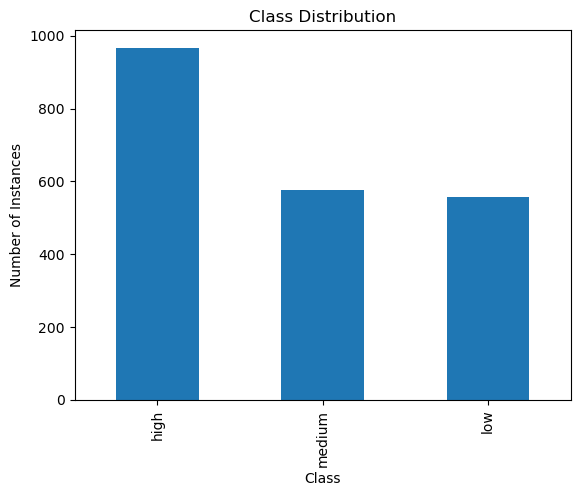

In [12]:
class_distribution = Y_data.value_counts()
print(class_distribution)
class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.title('Class Distribution')
plt.show()

In [14]:
#Categorize numerical and categorical data from the original dataset
#Sort out categorical data for preprocessing purposes

numerical_col = ['Age','Height(cm)', 'Weight(kg)', 'Vege_day', 'Meals_day', 'Water_intake(L)', 'Exercise', 'Income']
categorical_col = Cardiovascular_dataset.select_dtypes(include=['object', 'category']).columns.drop('Cardiovascular_risk(y)')
X_categorical = Cardiovascular_dataset.drop(numerical_col, axis = 1)
X_numerical = Cardiovascular_dataset.drop(X_categorical, axis = 1)

#categorical_col
#X_numerical

### 2.2.1 Standarize Numerical Data Features 

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standardized = scaler.fit_transform(X_numerical)
#standardized.shape

### 2.2.2 Encode Categorical Data Features into Numerical Format

In [16]:
#Turn categorical data into binary values

label_encoder = LabelEncoder()
X_categorical_encoded = pd.DataFrame(label_encoder.fit_transform(X_categorical['Gender']),columns=['Gender'])

for col in ['Family_history', 'Alcohol', 'Junk_food', 'Snack', 'Smoking','Transportation', 'TV', 'Discipline']:
    temp = pd.DataFrame(label_encoder.fit_transform(X_categorical[col]), columns=[col])
    X_categorical_encoded = pd.concat([X_categorical_encoded, temp], axis = 1)

#print(X_categorical_encoded.head())

In [17]:
#Preprocess target value (y) dataset

Y_processed = pd.DataFrame(label_encoder.fit_transform(Y_data),columns=['Cardiovascular_risk(y)'])

#Y_processed

In [18]:
#Completed preprocessed dataset by combining all processed categorical data and merge with numerical data

X_processed = pd.concat([X_numerical, X_categorical_encoded],axis = 1)
#print(X_processed)

### 2.3 Split Dataset into Training and Testing sets (80:20)

In [19]:
#Split dataset to training set and testing set by 80:20
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_processed, Y_processed, test_size=0.2, random_state=42)

## 3.0 Select and Train a Model

### 3.1 Training a Classification model

In [69]:
#RandomForest Classifier is chosen as the mechine learning model

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error

Forest = RandomForestClassifier(n_estimators=100, random_state = 42)
Forest.fit (X_train, y_train)
y_predicted = Forest.predict(X_train)

#print(y_predicted)

C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_2172\2575685029.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  Forest.fit (X_train, y_train)


### Display the list of features weight to the outcome ### 

In [70]:
# Get feature importances
importances = Forest.feature_importances_
indices = np.argsort(importances)[::-1]

# Display feature importances
for i in indices:
    print(f"{X_train.columns[i]}: {importances[i]}")

Weight(kg): 0.49836824239368277
Height(cm): 0.08859045411999165
Age: 0.06939670980583713
Snack: 0.06598672609799851
Family_history: 0.06453380553458338
Water_intake(L): 0.034268831226111955
Meals_day: 0.025381311557866916
Income: 0.024813042810223132
Transportation: 0.020319499585070674
Gender: 0.017769746933448106
Junk_food: 0.017670318763514707
Alcohol: 0.017435848922543462
Exercise: 0.016978943548431595
Vege_day: 0.015189958123120142
TV: 0.012421346231239614
Discipline: 0.008202962013143624
Smoking: 0.002672252333192587


### 3.2 Overfitting RandomForest Classifier ###
* ####  Nearly perfect result of prediction has been shown in Classifier #### 

In [71]:
#Calculate the accuracy of trained model

from sklearn import metrics
print('Model tested with Training dataset (accuracy):',metrics.accuracy_score(y_predicted, y_train))

Model tested with Training dataset (accuracy): 1.0


In [50]:
#Testing by using testing dataset, the accuracy result is much different from training set

y_test_pred = Forest.predict(X_test)
print('Model tested with Testing dataset (accuracy):',metrics.accuracy_score(y_test_pred, y_test))

Model tested with Testing dataset (accuracy): 0.9666666666666667


### 3.3 Inspect the overfitting context with cross validation score ###

#### Result shows that the previous outcome with training dataset is overfitting compare to cross validation score ####

In [51]:
from sklearn.model_selection import cross_val_score

k_fold_scores = cross_val_score(Forest, X_train, y_train, scoring = 'accuracy', cv=5)
print('cross validation score:', k_fold_scores)
print('Average:',(k_fold_scores.mean()))


C:\Users\HUAWEI\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HUAWEI\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HUAWEI\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HUAWEI\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector 

cross validation score: [0.9702381  0.95238095 0.9702381  0.9672619  0.97321429]
Average: 0.9666666666666666


C:\Users\HUAWEI\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


In [52]:
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(Forest, X_train, y_train, cv=5)
#y_pred

C:\Users\HUAWEI\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:1068: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HUAWEI\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:1068: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HUAWEI\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:1068: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HUAWEI\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:1068: DataConversionWarning: A column-vec

In [53]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,ConfusionMatrixDisplay
#Result of RandomForest model
cm = confusion_matrix(y_train, y_pred)
print(cm)
#print('accuracy:',metrics.accuracy_score(y_pred, y_train))

[[780   1   6]
 [  0 418  21]
 [  6  22 426]]


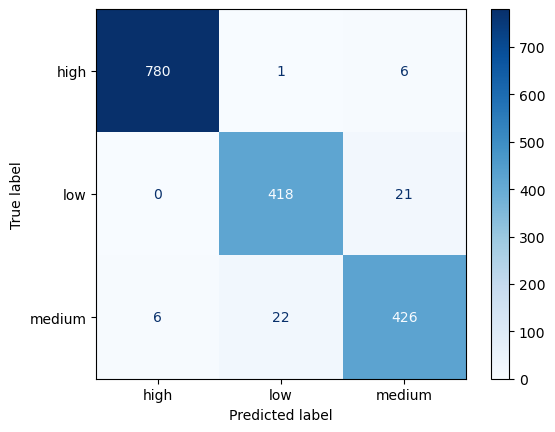

In [54]:
display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = label_encoder.classes_)
display.plot(cmap=plt.cm.Blues)
plt.show()

In [55]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('              Low        Medium       High')
print('precision = ',precision_score(y_train, y_pred, average=None))
print('recall    = ',recall_score (y_train, y_pred, average=None))
print('f1 score  = ',f1_score(y_train, y_pred,average=None))

              Low        Medium       High
precision =  [0.99236641 0.9478458  0.94039735]
recall    =  [0.99110546 0.95216401 0.93832599]
f1 score  =  [0.99173554 0.95       0.93936053]


In [56]:
#confidence scores of classification 

y_scores = Forest.predict_proba(X_train)
#y_scores.shape
np.set_printoptions(threshold=np.inf)
#y_scores

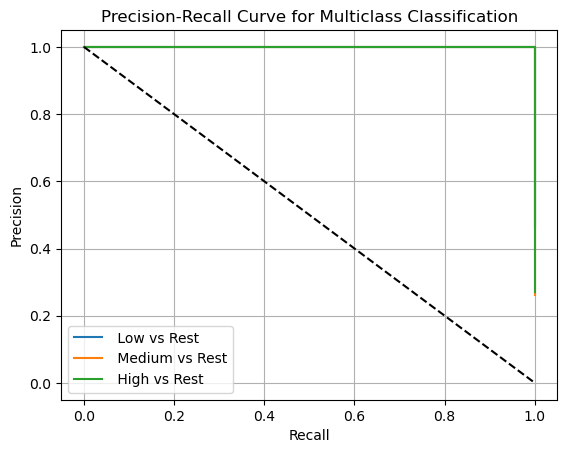

In [78]:
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize
y_binarize = label_binarize(y_train, classes=[0, 1, 2])
Title = ['Low', "Medium", 'High']

for i in range(len(Forest.classes_)):
    precisions, recalls, _ = precision_recall_curve(y_binarize[:, i], y_scores[:, i])
    plt.plot(recalls, precisions, label=f' {Title[i]} vs Rest')
    
plt.plot(np.linspace(0, 1, 20), np.linspace(1, 0, 20), 'k--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Multiclass Classification')
plt.legend(loc="best")
plt.grid(True)
plt.show()

## 4.0 Fine-Tuning the Random Forest model with GridSearch 

### 4.1 Fine_Tuned the Model for Better Preformance 
Result shows improvement compared to result of non fine_tuned model

In [33]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 160, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'bootstrap' : [True, False]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=Forest, param_grid=param_grid, cv=5, scoring='accuracy')
# Fit GridSearchCV
grid_search.fit(X_train, y_train)
# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

C:\Users\HUAWEI\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HUAWEI\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HUAWEI\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HUAWEI\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector 

Best Parameters: {'bootstrap': True, 'max_depth': None, 'n_estimators': 160}


In [72]:
print(y_predicted.shape)
print("Before fined-tuning (Accuracy):", metrics.accuracy_score(y_predicted, y_train))
print("Best Score (Accuracy): {:.4f}".format(grid_search.best_score_))
print("Best Estimator:", grid_search.best_estimator_)

(1680,)
Before fined-tuning (Accuracy): 1.0
Best Score (Accuracy): 0.9696
Best Estimator: RandomForestClassifier(n_estimators=160, random_state=42)


In [73]:
#Test the fine-tuned model with training dataset
best_model = grid_search.best_estimator_
y_pred = cross_val_predict(best_model, X_train, y_train, cv=5)
                                
#Result of precision, recall, f1 score, of cross validation predict
print("After fined-tuning (Accuracy):", metrics.accuracy_score(y_pred, y_train))
print('              Low        Medium       High')
print('precision = ',precision_score(y_train, y_pred, average=None))
print('recall    = ',recall_score (y_train, y_pred, average=None))
print('f1 score  = ',f1_score(y_train, y_pred,average=None))

C:\Users\HUAWEI\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:1068: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HUAWEI\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:1068: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HUAWEI\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:1068: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HUAWEI\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:1068: DataConversionWarning: A column-vec

After fined-tuning (Accuracy): 0.9696428571428571
              Low        Medium       High
precision =  [0.99616368 0.95011338 0.94310722]
recall    =  [0.98983482 0.95444191 0.94933921]
f1 score  =  [0.99298917 0.95227273 0.94621295]


In [74]:
#Cross validation scores before fined-tuning

from sklearn.model_selection import cross_val_score

k_fold_scores = cross_val_score(Forest, X_train, y_train, scoring = 'accuracy', cv=5)
print('cross validation score:', k_fold_scores)
print('Average:',(k_fold_scores.mean()))

C:\Users\HUAWEI\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HUAWEI\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HUAWEI\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HUAWEI\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector 

cross validation score: [0.9702381  0.95238095 0.9702381  0.9672619  0.97321429]
Average: 0.9666666666666666


C:\Users\HUAWEI\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


In [75]:
#Cross validation scores after fined-tuning

from sklearn.model_selection import cross_val_score

k_fold_scores = cross_val_score(best_model, X_train, y_train, scoring = 'accuracy', cv=5)
print('cross validation score:', k_fold_scores)
print('Average:',(k_fold_scores.mean()))

C:\Users\HUAWEI\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HUAWEI\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HUAWEI\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HUAWEI\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector 

cross validation score: [0.97321429 0.95535714 0.97321429 0.96428571 0.98214286]
Average: 0.9696428571428571


In [76]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,ConfusionMatrixDisplay
#Result of fine-tuned RandomForest model
cm = confusion_matrix(y_train, y_pred)
print(cm)
#print('accuracy:',metrics.accuracy_score(y_pred, y_train))

[[779   2   6]
 [  0 419  20]
 [  3  20 431]]


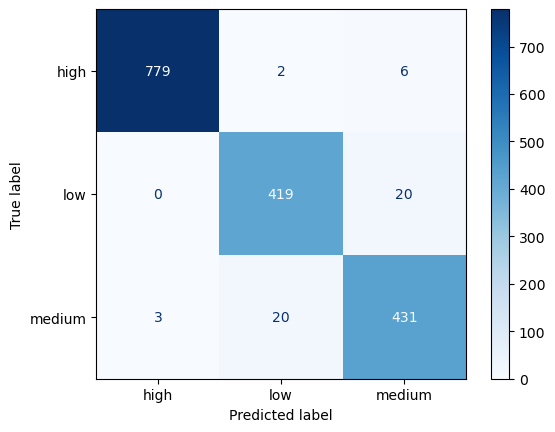

In [77]:
display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = label_encoder.classes_)
display.plot(cmap=plt.cm.Blues)
plt.show()

In [93]:
#precision, recall, at every threshold

for i in range(len(precisions)):
    print('precision\t\t\trecalls\t\t\tthreshold')
    print(precisions[i],"\t\t\t", recalls[i],'\t\t\t', _[i])

precision			recalls			threshold
0.2702380952380952 			 1.0 			 0.0
precision			recalls			threshold
0.40864086408640865 			 1.0 			 0.01
precision			recalls			threshold
0.49726177437020813 			 1.0 			 0.02
precision			recalls			threshold
0.5556915544675642 			 1.0 			 0.03
precision			recalls			threshold
0.6013245033112583 			 1.0 			 0.04
precision			recalls			threshold
0.6532374100719425 			 1.0 			 0.05
precision			recalls			threshold
0.686838124054463 			 1.0 			 0.06
precision			recalls			threshold
0.729903536977492 			 1.0 			 0.07
precision			recalls			threshold
0.7630252100840336 			 1.0 			 0.08
precision			recalls			threshold
0.7923211169284468 			 1.0 			 0.09
precision			recalls			threshold
0.8121645796064401 			 1.0 			 0.1
precision			recalls			threshold
0.8345588235294118 			 1.0 			 0.11
precision			recalls			threshold
0.851782363977486 			 1.0 			 0.12
precision			recalls			threshold
0.8730769230769231 			 1.0 			 0.13
precision			recalls			threshold
0.8954635108481263 

IndexError: index 61 is out of bounds for axis 0 with size 61

## 5.0 Test the models with testing dataset ##

In [187]:
#Result before fine tuned the model with testing dataset

y_pred_test = Forest.predict(X_test)
print('precision = {:.4f}'.format(precision_score(y_test, y_pred_test, average='weighted')))
print('recall    = {:.4f}'.format(recall_score (y_test, y_pred_test, average='weighted')))
print('f1 score  = {:.4f}'.format(f1_score(y_test, y_pred_test,average='weighted')))

precision = 0.9671
recall    = 0.9667
f1 score  = 0.9668


In [188]:
#Result after fine tuned the model with testing dataset

y_tuned_test = best_model.predict(X_test)
print('precision = {:.4f}'.format(precision_score(y_test, y_tuned_test, average='weighted')))
print('recall    = {:.4f}'.format(recall_score (y_test, y_tuned_test, average='weighted')))
print('f1 score  = {:.4f}'.format(f1_score(y_test, y_tuned_test,average='weighted')))

precision = 0.9714
recall    = 0.9714
f1 score  = 0.9714


In [197]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,ConfusionMatrixDisplay
#Confusion matrix Result before fined-tuning the RandomForest model

cm = confusion_matrix(y_test, y_pred_test)
print(cm)
#print('accuracy:',metrics.accuracy_score(y_test, y_pred_test))

[[178   0   2]
 [  0 111   7]
 [  1   4 117]]


### display confusion matrix of Result before fined-tuning the RandomForest model

display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = label_encoder.classes_)
display.plot(cmap=plt.cm.Blues)
plt.show()

In [199]:
#Confusion matrix Result after fined-tuning the RandomForest model

cm = confusion_matrix(y_test, y_tuned_test)
print(cm)
#print('accuracy:',metrics.accuracy_score(y_test, y_tuned_test))

[[179   0   1]
 [  0 113   5]
 [  1   5 116]]


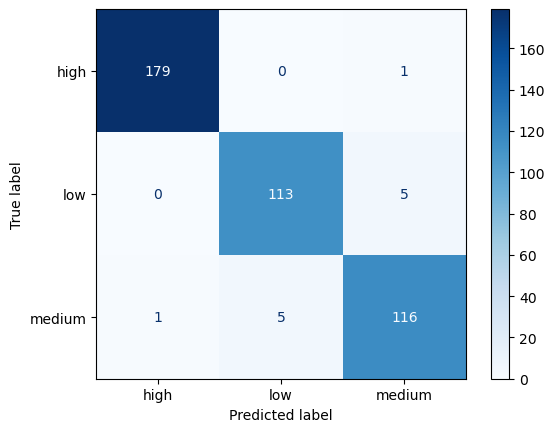

In [201]:
#display confusion matrix of Result before fined-tuning the RandomForest model

display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = label_encoder.classes_)
display.plot(cmap=plt.cm.Blues)
plt.show()

In [217]:
#confidence scores of classification 

y_scores = Forest.predict_proba(X_test)
#y_scores.shape
np.set_printoptions(threshold=np.inf)
#y_scores

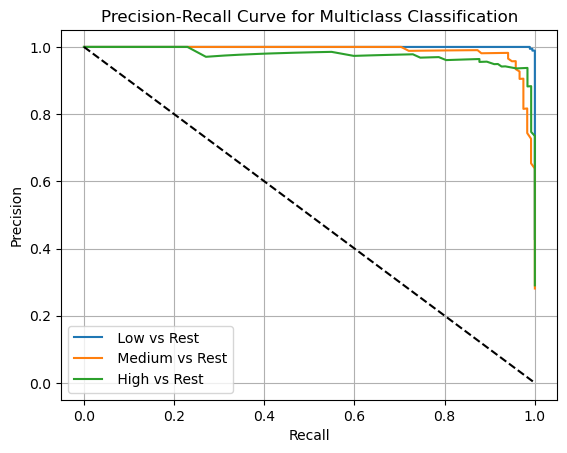

In [218]:
y_binarize = label_binarize(y_test, classes=[0, 1, 2])
Title = ['Low', "Medium", 'High']

for i in range(len(Forest.classes_)):
    precisions, recalls, _ = precision_recall_curve(y_binarize[:, i], y_scores[:, i])
    
    plt.plot(recalls, precisions, label=f' {Title[i]} vs Rest')
    
plt.plot(np.linspace(0, 1, 20), np.linspace(1, 0, 20), 'k--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Multiclass Classification')
plt.legend(loc="best")
plt.grid(True)
plt.show()

In [219]:
#confidence scores of classification 

y_scores = best_model.predict_proba(X_test)
#y_scores.shape
np.set_printoptions(threshold=np.inf)
#y_scores

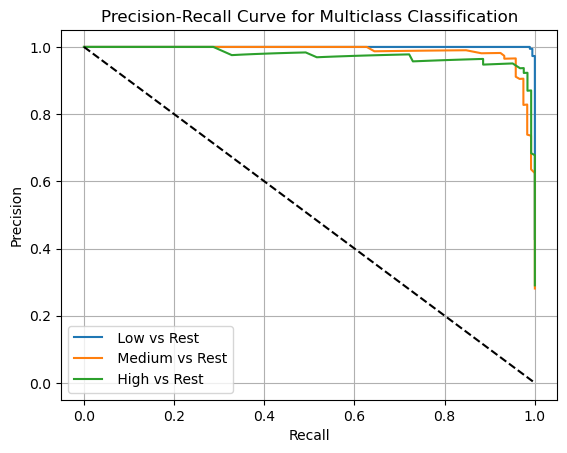

In [220]:
y_binarize = label_binarize(y_test, classes=[0, 1, 2])
Title = ['Low', "Medium", 'High']

for i in range(len(best_model.classes_)):
    precisions, recalls, _ = precision_recall_curve(y_binarize[:, i], y_scores[:, i])
    
    plt.plot(recalls, precisions, label=f' {Title[i]} vs Rest')
    
plt.plot(np.linspace(0, 1, 20), np.linspace(1, 0, 20), 'k--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Multiclass Classification')
plt.legend(loc="best")
plt.grid(True)
plt.show()